In [25]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Days on Market
---
Question 4: How long some of the real-estate stays on the market before they rent or sell?

Using the the Days-to-Pending and Days-to-Close variables. Data represents the weekly median of it's respective variables given a region.

In [26]:
# load data for analysis
weekly_pending_df = pd.read_csv('data/Metro_med_doz_pending_uc_sfrcondo_sm_week.csv')
weekly_close_df = pd.read_csv('data/Metro_median_days_to_close_uc_sfrcondo_sm_week.csv')
monthly_pending_df = pd.read_csv('data/Metro_med_doz_pending_uc_sfrcondo_sm_month.csv')
monthly_close_df = pd.read_csv('data/Metro_median_days_to_close_uc_sfrcondo_sm_month.csv')

# sample of weekly data
weekly_pending_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-27,2018-02-03,2018-02-10,2018-02-17,2018-02-24,...,2024-08-31,2024-09-07,2024-09-14,2024-09-21,2024-09-28,2024-10-05,2024-10-12,2024-10-19,2024-10-26,2024-11-02
0,102001,0,United States,country,NaN,49.0,44.0,38.0,33.0,28.0,...,21.0,21.0,22.0,22.0,22.0,22.0,22.0,22.0,23.0,24.0
1,394913,1,"New York, NY",msa,NY,88.0,86.0,81.0,74.0,60.0,...,28.0,29.0,30.0,31.0,30.0,29.0,28.0,28.0,29.0,30.0
2,753899,2,"Los Angeles, CA",msa,CA,25.0,20.0,16.0,15.0,15.0,...,18.0,19.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
3,394463,3,"Chicago, IL",msa,IL,62.0,53.0,45.0,35.0,26.0,...,11.0,12.0,13.0,13.0,13.0,14.0,13.0,14.0,15.0,15.0
4,394514,4,"Dallas, TX",msa,TX,39.0,35.0,31.0,28.0,25.0,...,31.0,33.0,33.0,34.0,34.0,35.0,34.0,34.0,34.0,33.0


##### Data Preparation and Manipulation
---
The 'Days to Pending' and 'Days to Close' monthly data would be easier to use if both values were stored in the same table. Luckily, They share the same regions (**RegionID**) and dates of data captured and can be joined on those values.

We can also pivot each table into it's long form before the join to further improve the usability of the data.

In [27]:
# define list of date columns in each table - used to specify which columns to melt longer
pending_date_columns = [col for col in monthly_pending_df.columns if col.startswith("20")]
close_date_columns = [col for col in monthly_close_df.columns if col.startswith("20")]

In [28]:
# melt monthly pending data
pending_df_melted = pd.melt(
    monthly_pending_df, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],
    value_vars=pending_date_columns, var_name="Month", value_name="Median Days to Pending")

pending_df_melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Month,Median Days to Pending
0,102001,0,United States,country,NaN,2018-03-31,31.0
1,394913,1,"New York, NY",msa,NY,2018-03-31,58.0
2,753899,2,"Los Angeles, CA",msa,CA,2018-03-31,17.0
3,394463,3,"Chicago, IL",msa,IL,2018-03-31,32.0
4,394514,4,"Dallas, TX",msa,TX,2018-03-31,27.0


In [29]:
# melt monthly close data
close_df_melted = pd.melt(
    monthly_close_df, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],
    value_vars=close_date_columns, var_name="Month", value_name="Median Days to Close")

close_df_melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Month,Median Days to Close
0,102001,0,United States,country,NaN,2018-03-31,32.0
1,394913,1,"New York, NY",msa,NY,2018-03-31,55.0
2,753899,2,"Los Angeles, CA",msa,CA,2018-03-31,31.0
3,394463,3,"Chicago, IL",msa,IL,2018-03-31,40.0
4,394514,4,"Dallas, TX",msa,TX,2018-03-31,20.0


In [30]:
# merge both monthly datasets such that 
monthly_df = pd.merge(close_df_melted, pending_df_melted[['RegionID','Month','Median Days to Pending']], 
                      on=('RegionID','Month'))

# cast date string to date time data type
monthly_df['Month'] = pd.to_datetime(monthly_df['Month'])
monthly_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Month,Median Days to Close,Median Days to Pending
0,102001,0,United States,country,NaN,2018-03-31,32.0,31.0
1,394913,1,"New York, NY",msa,NY,2018-03-31,55.0,58.0
2,753899,2,"Los Angeles, CA",msa,CA,2018-03-31,31.0,17.0
3,394463,3,"Chicago, IL",msa,IL,2018-03-31,40.0,32.0
4,394514,4,"Dallas, TX",msa,TX,2018-03-31,20.0,27.0


##### Analyzing the Data
---
After formatting the data how we want it, we can start the analysis of these data points by looking at national trends for both variables and see if there's any potential relationship.

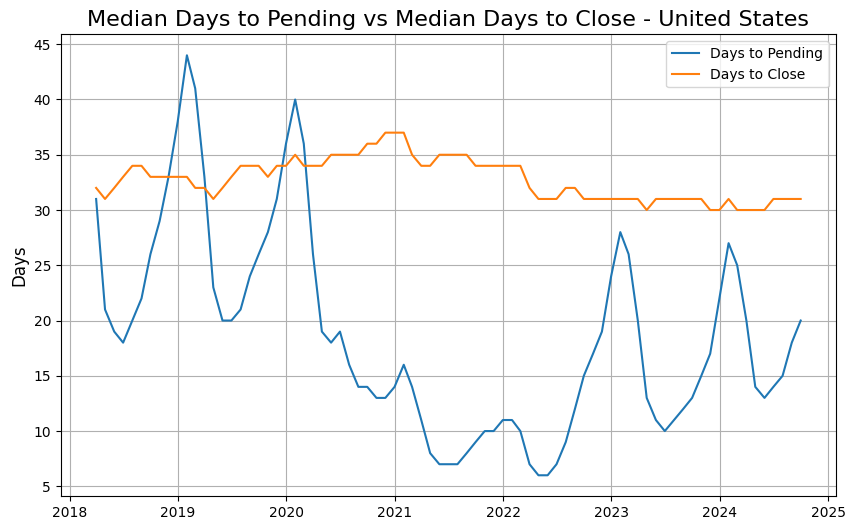

In [31]:
nationwide_df = monthly_df[monthly_df['RegionName'] == 'United States']

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Median Days to Pending', data=nationwide_df, label='Days to Pending')
sns.lineplot(x='Month', y='Median Days to Close', data=nationwide_df, label='Days to Close')

# Customize the plot
plt.title("Median Days to Pending vs Median Days to Close - United States", fontsize=16)
plt.xlabel("", fontsize=12)
plt.ylabel("Days", fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

The 'Days to Close' variable seems to remain pretty stable while 'Days to Pending' has much more distinct trends over certain periods of time. The 'Days to Pending' variable likely is much more useful in forecasting the time to sell a home. This makes sense as usually closing on a house depends much more on the relator and bank, while the time to make an offer depends much more on the buyer and their urgency when purchasing.

This is echoed by the lack of correlation between 'Days to Close' and 'Days to Pending' seen the the correlation matrix below.

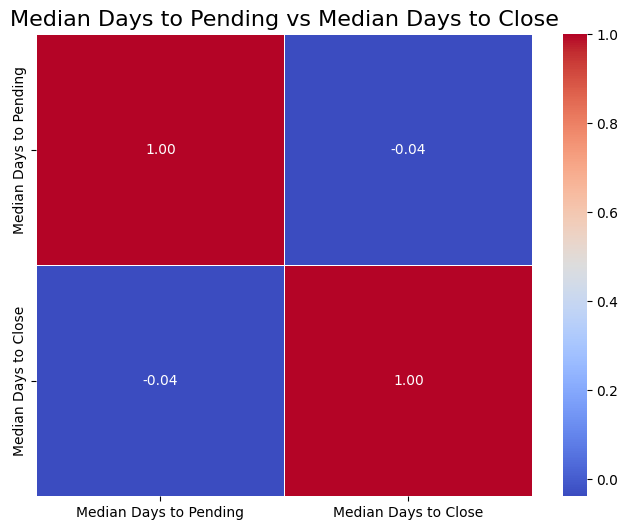

In [32]:
corr_matrix = nationwide_df[['Median Days to Pending','Median Days to Close']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title("Median Days to Pending vs Median Days to Close", fontsize=16)
plt.show()

In the time series above it's also worth noting that the 'Median Days to Pending' line seems to be highest in the winter and lowest in the summer while also maintaining and overall downwards trend. This means that that offers on homes are overall getting made faster and are particularly fast in the summer compared to the winter. This is backed up by an [article from the NCHFA](https://www.nchfa.com/news/home-matters-blog/why-are-spring-and-summer-biggest-home-buying-seasons) saying, "Spring and summer are the traditional home buying seasons...".

In [33]:
date_columns = [col for col in df.columns if col.startswith("20")]
df_melted = pd.melt(df, id_vars=['RegionID', 'SizeRank', 'RegionName', 'StateName'],
                    value_vars=date_columns, var_name="Week", value_name="Value")

df_melted['Week'] = pd.to_datetime(df_melted['Week'])

NameError: name 'df' is not defined

In [ ]:
date_columns_2 = [col for col in df2.columns if col.startswith("20")]
df2_melted = pd.melt(df2, id_vars=['RegionID', 'SizeRank', 'RegionName', 'StateName'],
                    value_vars=date_columns_2, var_name="Week", value_name="Value")

df2_melted['Week'] = pd.to_datetime(df2_melted['Week'])

In [ ]:
# weekly median days to pending


In [ ]:
# longest time-to-pending - areas are either too expensive or lack basic infrastructure if
# houses aren't selling quickly there
medians = df_melted.groupby("RegionName")["Value"].median().reset_index()
medians.sort_values(by='Value', ascending=False).head(25)

In [ ]:
# shortest time-to-pending - a bunch of midwestern communities 
# correlation with price? 
medians.sort_values(by='Value', ascending=True).head(50)

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y="Value", data=medians)

# Customize the plot
plt.title("Boxplot of Values by RegionName", fontsize=16)
plt.xlabel("RegionName", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [ ]:
medians.describe()

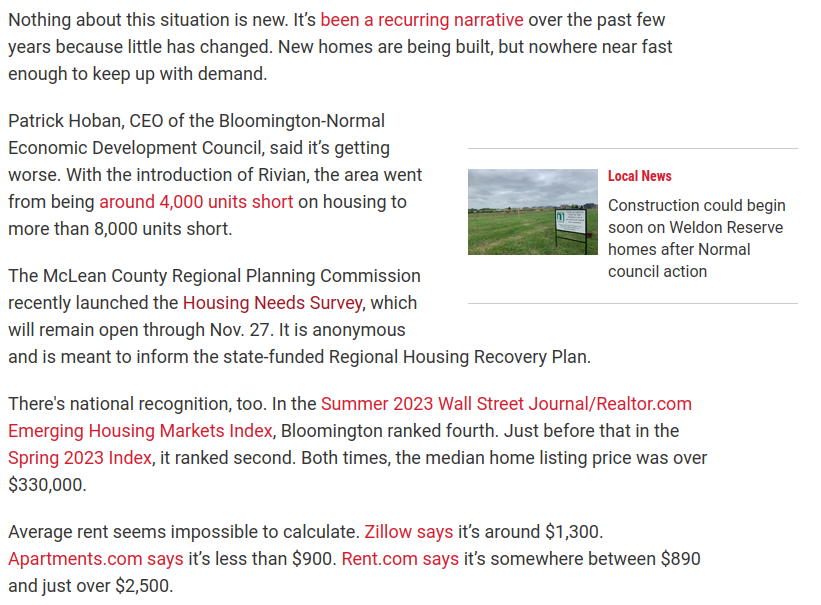

In [ ]:
medians[medians['RegionName'].str.endswith('MN')]

In [ ]:
medians[medians['RegionName'].str.endswith('NY')]

In [ ]:
medians[medians['RegionName'].str.endswith('CA')]

In [ ]:
# the 'hottest' housing markets aren't always selling houses quickly and the higher prices don't
# correlate with less time on the market

In [ ]:
"""
1. Combine time to pending and time to close into a single dataframe and get the
correlation between them (maybe use monthly to the get the better joins.
2. Split data into regions West, Midwest, Northeast, South and analyze within those regions
3. Take a handful of examples and do some more in-depth time series analysis
"""

In [39]:
monthly_df[monthly_df['RegionName'].str.endswith('WI')].sort_values(by='Month', ascending=False).head(25)

,RegionID,SizeRank,RegionName,RegionType,StateName,Month,Median Days to Close,Median Days to Pending
48498,394825,507,"Marinette, WI",msa,WI,2024-09-30,18.0,28.0
48303,395215,266,"Wausau, WI",msa,WI,2024-09-30,32.0,13.0
48088,394862,41,"Milwaukee, WI",msa,WI,2024-09-30,22.0,21.0
48135,394816,88,"Madison, WI",msa,WI,2024-09-30,30.0,15.0
48203,394646,157,"Green Bay, WI",msa,WI,2024-09-30,9.0,37.0
48241,394334,197,"Appleton, WI",msa,WI,2024-09-30,6.0,45.0
48295,394555,258,"Eau Claire, WI",msa,WI,2024-09-30,20.0,35.0
48272,395011,231,"Racine, WI",msa,WI,2024-09-30,27.0,14.0
48305,394720,268,"Janesville, WI",msa,WI,2024-09-30,30.0,9.0
48345,394756,311,"La Crosse, WI",msa,WI,2024-09-30,34.0,7.0
